# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file C:\Users\sumit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sumit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sumit\anaconda3\envs\pyvizen

In [2]:
# Read your api key environment variable
load_dotenv('sp.env')
api_key=os.getenv("news_api")


In [3]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles=newsapi.get_everything(q='Bitcoin',language='en')
bitcoin_articles['totalResults'] # total number of articles

10336

In [5]:
bitcoin_articles['articles'][19]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Tesla records $27 mln in impairment losses on bitcoin investment - Reuters',
 'description': 'Tesla records $27 mln in impairment losses on bitcoin investment\xa0\xa0Reuters',
 'url': 'https://www.reuters.com/article/us-crypto-currency-tesla-idUSKBN2CF1BG',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20210428&t=2&i=1560202159&r=LYNXMPEH3R0MC&w=800',
 'publishedAt': '2021-04-28T10:27:00Z',
 'content': 'By Reuters Staff\r\nFILE PHOTO: A Tesla supercharger is shown at a charging station in Santa Clarita, California, U.S. October 2, 2019. REUTERS/Mike Blake\r\n(Reuters) - Tesla Inc recorded $27 million of… [+114 chars]'}

In [6]:
# Fetch the Ethereum news articles
eth_articles=newsapi.get_everything(q='Ethereum',language='en')
eth_articles['totalResults'] # total number of articles

4166

In [7]:
eth_articles['articles'][19]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Gertrude Chavez-dreyfuss',
 'title': 'Analysis: Cryptocurrency ethereum is flourishing but risks linger - Reuters',
 'description': 'Ethereum has outperformed major digital currency rivals this year, bolstered by the surge in decentralized finance (DeFi) and the anticipation of a technical adjustment this summer, but it faces hurdles that could stall its rise.',
 'url': 'https://www.reuters.com/technology/cryptocurrency-ethereum-is-flourishing-risks-linger-2021-05-07/',
 'urlToImage': None,
 'publishedAt': '2021-05-07T18:58:00Z',
 'content': 'Ethereum has outperformed major digital currency rivals this year, bolstered by the surge in decentralized finance (DeFi) and the anticipation of a technical adjustment this summer, but it faces hurd… [+5218 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df=pd.DataFrame.from_dict(bitcoin_articles['articles'])

In [9]:
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,What Square’s smashing earnings tell us about ...,Today we're talking Square earnings and its bi...,http://techcrunch.com/2021/05/07/what-squares-...,https://techcrunch.com/wp-content/uploads/2020...,2021-05-07T18:17:36Z,Shares of Square are up more than 6% today aft...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Rebecca Bellan,Tesla sees bitcoin as important financial tool...,Tesla’s relationship with bitcoin is not a dal...,http://techcrunch.com/2021/04/26/tesla-sees-bi...,https://techcrunch.com/wp-content/uploads/2021...,2021-04-27T01:36:46Z,Tesla’s relationship with bitcoin is not a dal...
2,"{'id': None, 'name': 'Lifehacker.com'}",Mike Winters,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Tage Kene-Okafor,African crypto usage spurs Luno as customers r...,The crypto industry as a whole has seen a mome...,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,2021-04-13T08:30:21Z,The crypto industry as a whole has seen a mome...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto market takes a dive with Bitcoin leadin...,Cryptocurrency prices continued to tumble Frid...,http://techcrunch.com/2021/04/23/crypto-market...,https://techcrunch.com/wp-content/uploads/2020...,2021-04-23T17:58:10Z,Cryptocurrency prices continued to tumble Frid...


In [10]:
bitcoin_df.shape

(20, 8)

In [11]:
bitcoin_sentiments=[]

for article in bitcoin_articles['articles']:
    try:
        text=article['content']
        date=article['publishedAt'][:10]
        sentinment=analyzer.polarity_scores(text)
        compound=sentinment['compound']
        pos = sentinment['pos']
        neu =sentinment['neu']
        neg = sentinment['neg']

        bitcoin_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'pos':pos,
            'neu': neu,
            'neg':neg

        })
    except AttributeError:
        pass
bitcoin_sentiments=pd.DataFrame(bitcoin_sentiments,columns=['date','text','compound','pos','neu','neg'])

In [12]:
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment=[]
for article in eth_articles['articles']:
    try:
        date=article['publishedAt'][:10]
        text=article['content']
        sentinment=analyzer.polarity_scores(text)
        compound=sentinment['compound']
        positive=sentinment['pos']
        neutral=sentinment['neu']
        negative=sentinment['neg']

        eth_sentiment.append({

            'date':date,
            'text':text,
            'compound':compound,
            'neutral':neutral,
            'positive': positive,
            'negative':negative,
            
        })
    except AttributeError:
        pass

eth_sentiment=pd.DataFrame(eth_sentiment,columns=['date','text','compound','neutral','positive','negative'])

In [14]:
eth_sentiment.head()

,date,text,compound,neutral,positive,negative
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.mean()

compound    0.284405
pos         0.078450
neu         0.911300
neg         0.010300
dtype: float64

In [16]:
# Describe the Ethereum Sentiment
eth_sentiment.mean()

compound    0.120525
neutral     0.948900
positive    0.041850
negative    0.009250
dtype: float64

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher positive mean score of 0.0784 compared to Ethereum's 0.0418

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound mean score of 0.2844 cf. 0.1205

Q. Which coin had the highest neutral score?

A: Ethereum has the highest neutral score of 0.9489 cf. Eth's 0.9113

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# bitcoin_sentiments.text
print(eth_sentiment.text)

0     Their investors call them disruptive innovator...
1     Cryptocurrency continues to gain mainstream ac...
2     Venmo is jumping aboard the cryptocurrency ban...
3     New York (CNN Business)Bitcoin prices continue...
4     The creators behind CryptoPunks, one of the mo...
5     ConsenSys, a key player in crypto and a major ...
6     By Reuters Staff\r\nFILE PHOTO: A representati...
7     A representation of virtual currency Ethereum ...
8     It took a while to get here, but Dfinity is fi...
9     This story originally appeared on StockMarketU...
10    Non-fungible tokens (NFTs) are quickly becomin...
11    This article was translated from our Spanish e...
12    Posted \r\nThe S&amp;P Dow Jones Indices launc...
13    A representation of virtual currency Ethereum ...
14    By Reuters Staff\r\nSINGAPORE, May 3 (Reuters)...
15    Sotheby's said on Tuesday it would accept bitc...
16    NEW YORK, May 7 (Reuters) - Ethereum has outpe...
17    By Reuters Staff\r\nFILE PHOTO: A represen

In [19]:
# Instantiate the lemmatizer
lmt=WordNetLemmatizer()

# Create a list of stopwords
sw=set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon=['Reuters', 'Staff','[',']','char','reuters','said']



In [51]:
for i in sw_addon:
    sw.add(i)
print(sw)

{'out', 'you', 'which', 'himself', 'what', 'such', "aren't", 'had', 'these', 'aren', 'at', 'didn', "you're", 'have', 'too', 'm', 'here', 'he', 'in', 'reuters', 'doesn', 'this', 'most', 'wouldn', 'just', "shan't", 'it', 'said', 'is', 'your', 'down', 'other', 'between', 'itself', 'again', 'can', 'above', "mightn't", 'her', 'couldn', "didn't", 'than', "she's", 'herself', 'during', 'only', 'very', 'o', 'yours', 'whom', "haven't", 'any', 'having', 'an', "you've", 'and', 'more', 'should', 'through', 'ma', 'all', 'then', 'now', 'were', 'do', 'but', 'to', 'haven', 'weren', "won't", 'both', 'who', 'so', 'we', 'yourself', 'or', 'needn', "you'd", 'as', 'i', 'after', 'up', 'me', 'not', 'are', 'him', 'won', 'off', 'y', 'hasn', 'ours', 'where', 'has', 'into', 'our', 'myself', 'for', 's', 'be', 'because', 'why', 'that', 'his', "hadn't", 'isn', "wasn't", 'from', 'while', ']', 'no', 'if', 'ain', 'on', 'them', 'was', 'when', "hasn't", 'over', 'doing', 'mightn', 'there', 'each', 'below', 'they', 'of', 'a

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex=re.compile('[^a-zA-z0-9\w\s]')
    re_clean=regex.sub(' ', text)
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem=[lmt.lemmatize(word) for word in words]
   
    # Convert the words to lowercase # Remove the stop words
    tokens=[word.lower() for word in lem if word.lower() not in sw]
    
    
    
    return tokens

In [53]:
# Create a new tokens column for Bitcoin
tokens=[]
for row in bitcoin_sentiments.text:
    token=tokenizer(row)
    tokens.append(token)


In [54]:
print(tokens[0])

['shares', 'square', '6', 'today', 'american', 'fintech', 'company', 'reported', 'staggering', '5', '06', 'billion', 'revenue', 'q1', '2021', 'earnings', 'report', 'far', 'ahead', 'expected', 'tally', '3', '36', 'bi', '2045']


In [55]:
bitcoin_sentiments['tokens']=tokens
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg,tokens,bigram
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0,"[shares, square, 6, today, american, fintech, ...","{('shares', 'square'): 1, ('square', '6'): 1, ..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0,"[tesla, relationship, bitcoin, dalliance, acco...","{('tesla', 'relationship'): 1, ('relationship'..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0,"[crypto, industry, whole, ha, seen, momentous,...","{('crypto', 'industry'): 1, ('industry', 'whol..."
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0,"[cryptocurrency, price, continued, tumble, fri...","{('cryptocurrency', 'price'): 1, ('price', 'co..."


In [56]:
# Create a new tokens column for Ethereum
tokens=[]
for row in eth_sentiment.text:
    token=tokenizer(row)
    tokens.append(token)

In [57]:
print(tokens[0])

['investor', 'call', 'disruptive', 'innovator', 'detractors', 'like', 'north', 'carolina', 'attorney', 'general', 'josh', 'stein', 'call', 'dirty', 'scammer', 'leda', 'health', 'co', 'founder', 'madison', 'campbell', 'liesel', 'vaidya', 'th', '8679']


In [58]:
eth_sentiment['tokens']=tokens
eth_sentiment.head()

,date,text,compound,neutral,positive,negative,tokens,bigram
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111,"[investor, call, disruptive, innovator, detrac...","{('investor', 'call'): 1, ('call', 'disruptive..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000,"[venmo, jumping, aboard, cryptocurrency, bandw...","{('venmo', 'jumping'): 1, ('jumping', 'aboard'..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000,"[new, york, cnn, business, bitcoin, price, con...","{('new', 'york'): 1, ('york', 'cnn'): 1, ('cnn..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000,"[creator, behind, cryptopunks, one, popular, n...","{('creator', 'behind'): 1, ('behind', 'cryptop..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [59]:
from collections import Counter
from nltk import ngrams

In [60]:
# Generate the Bitcoin N-grams where N=2
bigram_counts=[]
for row in bitcoin_sentiments.tokens:
    bigram_count=Counter(ngrams(row,2))
    bigram_counts.append(bigram_count)
# print(bigram_counts)
bitcoin_sentiments['bigram']=bigram_counts
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg,tokens,bigram
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0,"[shares, square, 6, today, american, fintech, ...","{('shares', 'square'): 1, ('square', '6'): 1, ..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0,"[tesla, relationship, bitcoin, dalliance, acco...","{('tesla', 'relationship'): 1, ('relationship'..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0,"[crypto, industry, whole, ha, seen, momentous,...","{('crypto', 'industry'): 1, ('industry', 'whol..."
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0,"[cryptocurrency, price, continued, tumble, fri...","{('cryptocurrency', 'price'): 1, ('price', 'co..."


In [61]:
# Generate the Ethereum N-grams where N=2
bigram_counts=[]
for row in eth_sentiment.tokens:
    bigram_count=Counter(ngrams(row,2))
    bigram_counts.append(bigram_count)
# print(bigram_counts)
eth_sentiment['bigram']=bigram_counts
eth_sentiment.head()

,date,text,compound,neutral,positive,negative,tokens,bigram
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111,"[investor, call, disruptive, innovator, detrac...","{('investor', 'call'): 1, ('call', 'disruptive..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000,"[venmo, jumping, aboard, cryptocurrency, bandw...","{('venmo', 'jumping'): 1, ('jumping', 'aboard'..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000,"[new, york, cnn, business, bitcoin, price, con...","{('new', 'york'): 1, ('york', 'cnn'): 1, ('cnn..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000,"[creator, behind, cryptopunks, one, popular, n...","{('creator', 'behind'): 1, ('behind', 'cryptop..."


In [62]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string=' '.join(tokens)
    tokenised=tokenizer(big_string)
    return dict(Counter(tokenised).most_common(N))

In [63]:
# Use token_count to get the top 25 words for Bitcoin
tokens=bitcoin_sentiments.text
token_count(tokens,N=25)

{'bitcoin': 15,
 'cryptocurrency': 7,
 'ha': 6,
 'tesla': 5,
 'monday': 4,
 'service': 4,
 'staff': 4,
 'company': 3,
 'coin': 3,
 'instead': 3,
 'cash': 3,
 'venmo': 3,
 'million': 3,
 'price': 3,
 'two': 3,
 'musk': 3,
 'major': 3,
 'inc': 3,
 'energy': 3,
 'shares': 2,
 '6': 2,
 'today': 2,
 'earnings': 2,
 'announced': 2,
 'app': 2}

In [64]:
# Use token_count to get the top 10 words for Ethereum
tokens=eth_sentiment.text
token_count(tokens,N=25)

{'ethereum': 10,
 'currency': 7,
 'cryptocurrency': 6,
 'bitcoin': 6,
 'stock': 6,
 'illustration': 6,
 'ha': 5,
 '000': 4,
 'project': 4,
 'major': 4,
 'staff': 4,
 'representation': 4,
 'virtual': 4,
 'seen': 4,
 'front': 4,
 'graph': 4,
 'taken': 4,
 'february': 4,
 '19': 4,
 '2021': 4,
 'dado': 4,
 'ruvic': 4,
 'singapore': 4,
 'ether': 4,
 'monday': 4}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [66]:
import spacy
from spacy import displacy

In [67]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [68]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

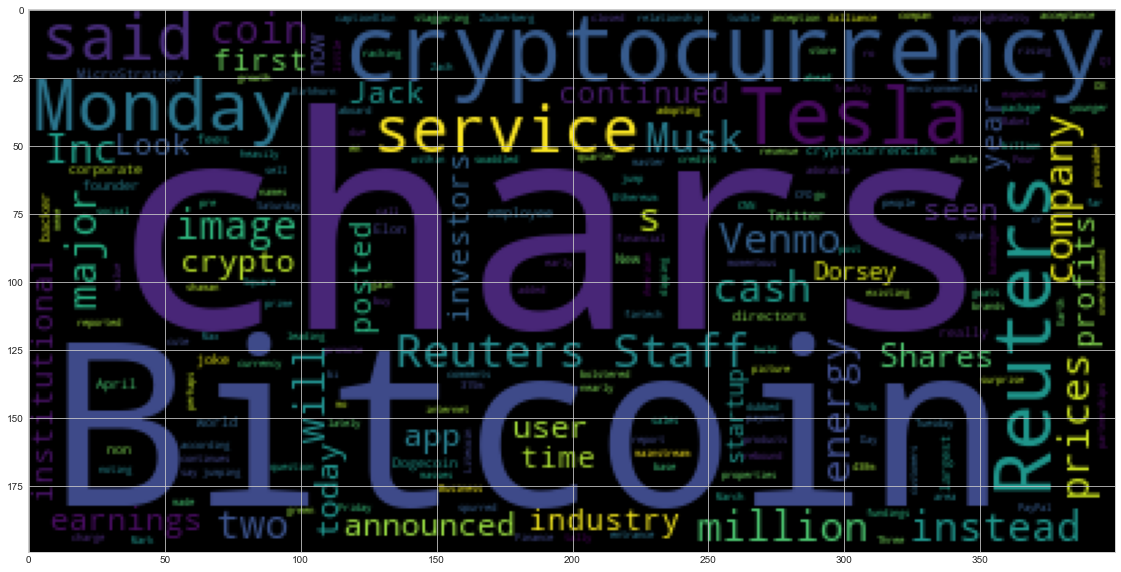

In [81]:
# Concatenate all of the Bitcoin text together
all_bitcoin=[]
for text in bitcoin_sentiments.text:
    all_bitcoin.append(text)
    
all_bitcoin_txt=(' '.join(all_bitcoin))
wc=WordCloud().generate(all_bitcoin_txt)
plt.imshow(wc)


In [70]:
print(all_bitcoin_txt)

Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,00

In [71]:
# Run the NER processor on all of the text
doc=nlp(all_bitcoin_txt)

# Add a title to the document
# doc

In [84]:
# Render the visualization
# html=displacy.render(doc, style='ent')

displacy.render(doc, style='ent')

In [73]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Elon Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coi

---

### Ethereum NER

In [74]:
# Concatenate all of the Ethereum text together, # Run the NER processor on all of the text
all_eth=[]
for text in eth_sentiment.text:
    all_eth.append(text)
    
all_eth_txt=(' '.join(all_eth))

In [75]:
# Add a title to the document
# YOUR CODE HERE!

In [85]:
# Render the visualization
doc1=nlp(all_eth_txt)
displacy.render(doc1, style='ent')

In [86]:
# List all Entities
for ent in doc1.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Mo

---

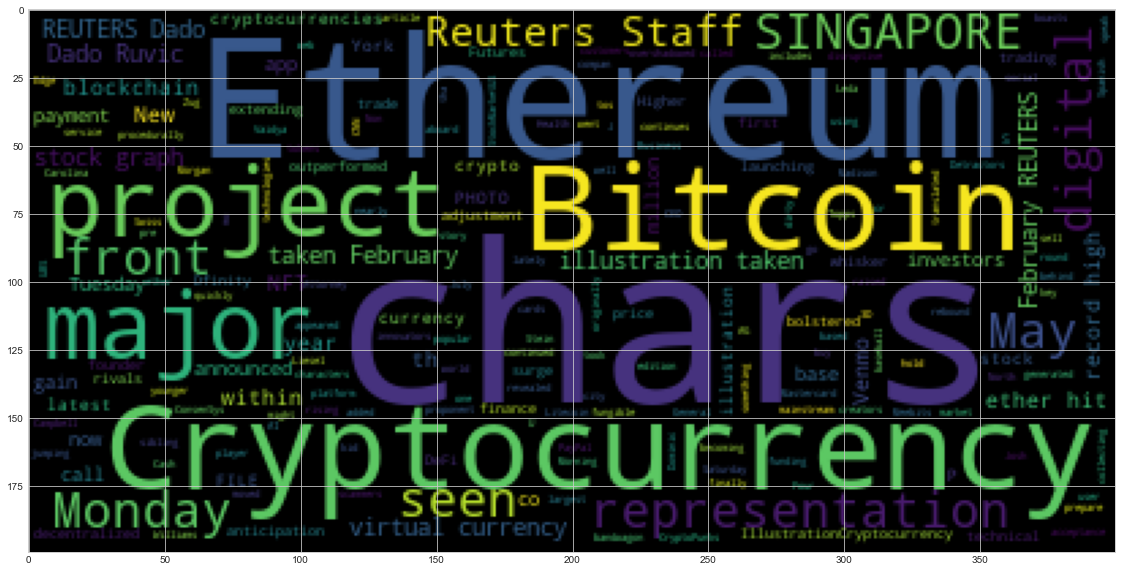

In [78]:
wc=WordCloud().generate(all_eth_txt)
plt.imshow(wc)
